In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

In [58]:
data = pd.read_csv('vw_churndata.csv')

In [59]:
data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,19877-DEL,Male,35,No,Delhi,7,27,NaN,Yes,No,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,Others,Others
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,NaN,Yes,Yes,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,Others,Others
2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,80,No,Tamil Nadu,3,8,NaN,Yes,No,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [60]:
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

In [61]:
columns_to_encode = [
'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
'Payment_Method'
]

In [62]:
label_encoders = {}

In [63]:
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [64]:
data['Customer_Status'] = data['Customer_Status'].map({'Stayed':0,'Churned':1})

In [65]:
X = data.drop('Customer_Status',axis=1)
y = data['Customer_Status']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [68]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [69]:
y_pred = rf_model.predict(X_test)

In [70]:
print("Confusion Matrix - ")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix - 
[[791  50]
 [125 236]]


In [71]:
print("Classification Report - ")
print(classification_report(y_test, y_pred))

Classification Report - 
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       841
           1       0.83      0.65      0.73       361

    accuracy                           0.85      1202
   macro avg       0.84      0.80      0.81      1202
weighted avg       0.85      0.85      0.85      1202



In [72]:
importances = rf_model.feature_importances_

In [73]:
indices = np.argsort(importances)[::-1]

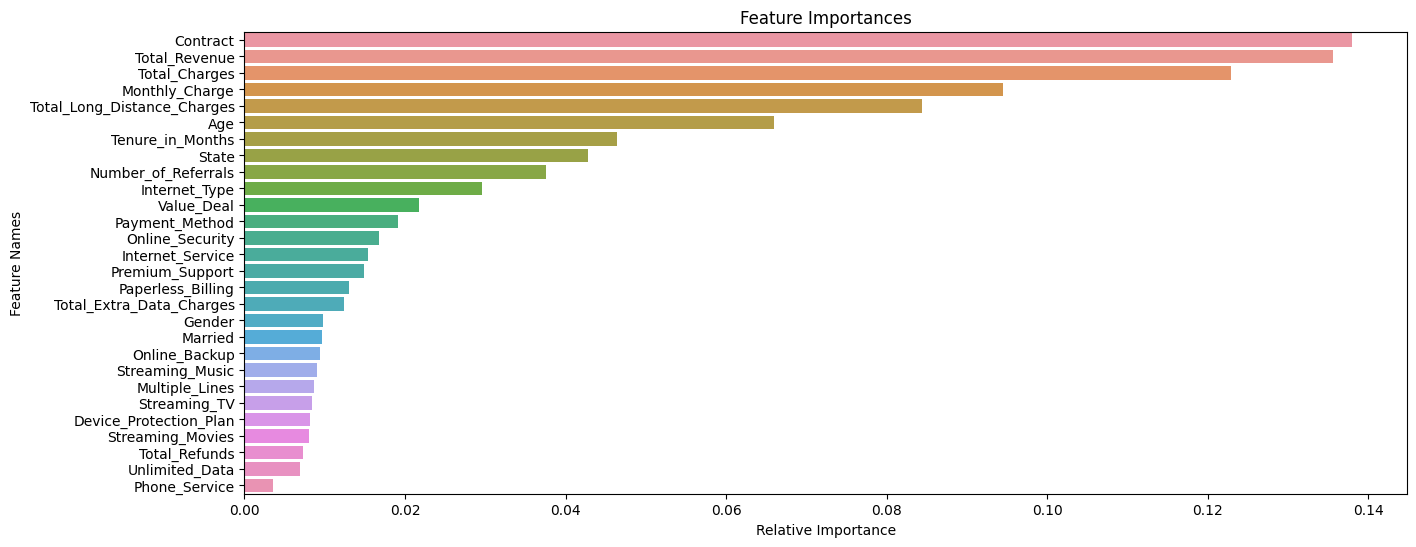

In [74]:
plt.figure(figsize=(15,6))
sns.barplot(x=importances[indices],y=X.columns[indices])
plt.title("Feature Importances")
plt.xlabel("Relative Importance")
plt.ylabel("Feature Names")
plt.show()

In [75]:
new_data = pd.read_csv('vw_joindata.csv')

In [76]:
new_data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,93520-GUJ,Female,67,No,Gujarat,13,19,Deal 5,Yes,Yes,...,Bank Withdrawal,72.10,72.1,0.0,0,7.77,79.87,Joined,Others,Others
1,57256-BIH,Female,18,No,Bihar,9,7,NaN,Yes,No,...,Credit Card,19.85,57.2,0.0,0,9.36,66.56,Joined,Others,Others
2,72357-MAD,Female,53,No,Madhya Pradesh,14,12,Deal 5,Yes,No,...,Credit Card,44.30,44.3,0.0,0,42.95,87.25,Joined,Others,Others
3,66612-KAR,Female,58,Yes,Karnataka,11,18,NaN,Yes,No,...,Credit Card,19.95,58.0,0.0,0,8.07,66.07,Joined,Others,Others
4,22119-WES,Male,31,Yes,West Bengal,5,5,NaN,Yes,No,...,Credit Card,20.05,33.7,0.0,0,3.62,37.32,Joined,Others,Others


In [77]:
original_data = new_data.copy()

In [78]:
customer_ids = new_data['Customer_ID']

In [79]:
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

In [80]:
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

In [81]:
new_predictions = rf_model.predict(new_data)

In [82]:
original_data['Customer_Status_Predicted'] = new_predictions

In [83]:
original_data = original_data[original_data['Customer_Status_Predicted']==1]

In [84]:
original_data.to_csv('Predictions.csv',index=False)